# <span style=color:red>Tasca M4 T02 <span> 

## <span style=color:red> Exercici 2<span>
### <span style=color:red>Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.<span>

### <span style=color:red>->PRE-PROCESSING-DATA/movies.dat<span>

In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Primero importamos las biblioteca que creemos necesarias para realizar nuestra actividad.

In [229]:
import chardet

archivo_entrada = 'movies.dat'  # Ingresar nombre de archivo de entrada

# Detectar la codificación de movies.dat
with open(archivo_entrada, 'rb') as archivo:
    resultado = chardet.detect(archivo.read())

# El resultado contiene información sobre la codificación detectada
codificacion = resultado['encoding']

codificacion

'ISO-8859-1'

### Al intentar importar el DataSet "movies.dat" nos encontramos con un error al ejecutar el comando read_csv ya que la codificacion del archivo no es compatible con UTF-8 con la que trabaja python. 
### Para solucionar el problema primero tenemos que averiguar cual es la codificacion que trae el archivo para ello importamos la biblioteca chardet que detecta automaticamente que formato tiene el archivo que intentamos importar en este caso es 'ISO-8859-1'.

In [230]:
# Ruta al movies.dat de y ruta al nuevo archivo de salida movies_utf8.txt
archivo_entrada = 'movies.dat'
archivo_salida = 'movies_utf8.txt'

# Poner la codificacion de movies.dat
codificacion_actual = 'ISO-8859-1'

# Leer el archivo la codificacion de movies.dat
with open(archivo_entrada, 'r', encoding=codificacion_actual) as archivo_entrada:
    contenido = archivo_entrada.read()

# Guarda el contenido en un archivo UTF-8
with open(archivo_salida, 'w', encoding='utf-8') as archivo_salida:
    archivo_salida.write(contenido)

### El siguiente paso es convertir este archivo en formato 'ISO-8859-1' a UTF-8 con el que trabaja Python. Para ello utilizaremos el comando open() en donde indicaremos que primero abra el archivo en su formato original y lo guarde tal cual en el formato que indicamos anteriormente.

In [231]:
movies = pd.read_csv('movies_utf8.txt', sep='\t', encoding='utf-8')

In [232]:
movies

,1::Toy Story (1995)::Animation|Children's|Comedy
0,2::Jumanji (1995)::Adventure|Children's|Fantasy
1,3::Grumpier Old Men (1995)::Comedy|Romance
2,4::Waiting to Exhale (1995)::Comedy|Drama
3,5::Father of the Bride Part II (1995)::Comedy
4,6::Heat (1995)::Action|Crime|Thriller
...,...
3877,3948::Meet the Parents (2000)::Comedy
3878,3949::Requiem for a Dream (2000)::Drama
3879,3950::Tigerland (2000)::Drama
3880,3951::Two Family House (2000)::Drama


### Luego de comprobar su funcionamiento vemos que el archivo puede ser leido correctamente y cuanta con 3882 registros alojados en una sola columna lo cual tendremos que solucionar en la siguiente linea para poder operar con el DataSet.

In [233]:
movies = pd.read_csv('movies_utf8.txt', delimiter='::', encoding='utf-8')

In [234]:
movies

,1,Toy Story (1995),Animation|Children's|Comedy
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


### habiendo indicado anteriormente mediante el parametro sep='\t' dentro del comando read_csv comprobamos que no funcionaba, por lo que hemos cambiado este parametro por delimiter='::' indicando que separe las columnas lo que ha funcionado correctamente.

In [235]:
movies.shape

(3882, 3)

### utilizamos el atributo shape para comprobar las dimensiones que pueda tener nuestro DataSet en este caso cuenta con 3382 rows y 3 columnas

In [236]:
movies.columns

Index(['1', 'Toy Story (1995)', 'Animation|Children's|Comedy'], dtype='object')

### Luego comprobamos que columnas tiene nuestro DataSet lo que nos idica que el DataSet no cuenta con una estructura de columas por lo que debemos asignar nosotros mismos cuales queremos que sean.

In [237]:
movies.columns = ['ID', 'Nombre', 'Genero']
movies

,ID,Nombre,Genero
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
3877,3948,Meet the Parents (2000),Comedy
3878,3949,Requiem for a Dream (2000),Drama
3879,3950,Tigerland (2000),Drama
3880,3951,Two Family House (2000),Drama


### Luego de asignar las columnas que deseamos podemos ver que el primer registro en esta caso la pelicula Toy Story fue suprimida de nustro DataSet, la forma para no sufrir este inconveniente es definir las columnas directamente a la hora de importar nuestro dataset en el comando read_csv con el parametro names=''

In [238]:
movies = pd.read_csv('movies_utf8.txt', delimiter='::', encoding='utf-8', names=['ID', 'Nombre', 'Genero'])
movies

,ID,Nombre,Genero
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


### De esta manera comprobamos que no se ha perdido ningun dato.

In [239]:
movies.dtypes

ID         int64
Nombre    object
Genero    object
dtype: object

### Otra de las comprobaciones que podemos hacer es saber que formato tiene cada una de nuestras columnas, en este caso podemos ver que el tipo de dato en nuestras columnas es numerico para ID pero las otras dos columnas contienen objetos dentro algo que nos puede resultar util a la hora de intentar operar con ellas. Lo primero que debemos hacer es manipular los strings para  extraer el año donde fue creada la pelicula y asignarlo a una nueva columna a la que llamaremos Año.

In [240]:
movies['Año'] = movies['Nombre'].str.extract(r'\((\d{4})\)$')
movies['Nombre'] = movies['Nombre'].str.replace(r'\(\d{4}\)', '').str.strip()
movies


,ID,Nombre,Genero,Año
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


### Primero indicamos mediante el metodo str.extract que extraiga todos los caracteres en este caso una secuencia de cuatro dígitos (que representan el año) dentro de paréntesis y los coloque en una nueva columna a la que llamaremos Año.

### Luego indicamos que en esa misma columna replace() para eliminar esa extraccion y strip() para eliminar ese espacio en blanco.

In [241]:
movies['Año'].dtype

dtype('O')

In [242]:
movies['Año'] = pd.to_numeric(movies['Año'], errors='coerce')
movies['Año'].dtype

dtype('int64')

In [243]:
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3883.0,1986.049446,1146.778349,1.0,982.5,2010.0,2980.5,3952.0
Año,3883.0,1986.066959,16.895690,1919.0,1982.0,1994.0,1997.0,2000.0


### Luego de cambiar el tipo de dato de la columna recien agregada 'Año', hacemos una descripcion estadistica breve en donde podemos veer que la pelicula mas reciente es del año 2000, la mas antigua de 1919 lo cual nos puede servir para realizar los graficos mas adealante.

In [244]:
movies['Genero'] = movies['Genero'].apply(lambda x: x.split('|'))
movies


,ID,Nombre,Genero,Año
0,1,Toy Story,"[Animation, Children's, Comedy]",1995
1,2,Jumanji,"[Adventure, Children's, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama]",1995
4,5,Father of the Bride Part II,[Comedy],1995
...,...,...,...,...
3878,3948,Meet the Parents,[Comedy],2000
3879,3949,Requiem for a Dream,[Drama],2000
3880,3950,Tigerland,[Drama],2000
3881,3951,Two Family House,[Drama],2000


### Para continuar con la manipulacion de nuestros strigs, vemos que la columna Genero tiene todos los generos separados por "|", para poder operar con esta columna primero debemos dividir este string y llevarlo a una lista, para ello utilizamos el metodo split("|"), para ejecutar esto en toda la columna utiizamos el metodo apply.

In [245]:
movies['Genero'] = movies['Genero'].apply(lambda x: x[0] if x else None)
movies

,ID,Nombre,Genero,Año
0,1,Toy Story,Animation,1995
1,2,Jumanji,Adventure,1995
2,3,Grumpier Old Men,Comedy,1995
3,4,Waiting to Exhale,Comedy,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents,Comedy,2000
3879,3949,Requiem for a Dream,Drama,2000
3880,3950,Tigerland,Drama,2000
3881,3951,Two Family House,Drama,2000


### Por ultimo en cuanto al formateo de nuestros strings, se nos pide que nos quedemos con un solo genero, esto lo llevamos acabo mediante una funcion LAMBDA en donde indicamos que si el elemento no es una cadena vacia se queda con el primer genero, en caso de ser nula quedaria con valor none.

In [246]:
movies_sorted = movies.sort_values(by='Genero')
movies_sorted

,ID,Nombre,Genero,Año
2513,2582,Twin Dragons (Shuang long hui),Action,1992
1489,1525,Warriors of Virtue,Action,1997
1487,1523,"Truth or Consequences, N.M.",Action,1997
1483,1518,Breakdown,Action,1997
430,434,Cliffhanger,Action,1993
...,...,...,...,...
549,553,Tombstone,Western,1993
3573,3642,In Old California,Western,1942
1859,1928,Cimarron,Western,1931
3737,3806,MacKenna's Gold,Western,1969


### Ordenamos las peliculas por Genero

In [247]:
Genero = movies['Genero'].value_counts()
print(Genero)

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: Genero, dtype: int64


### Luego de realizar un conteo de valores en la columna 'Genero' podemos ver que cantidad de peliculas hay por cada uno de ellos para asi poder graficarlos.

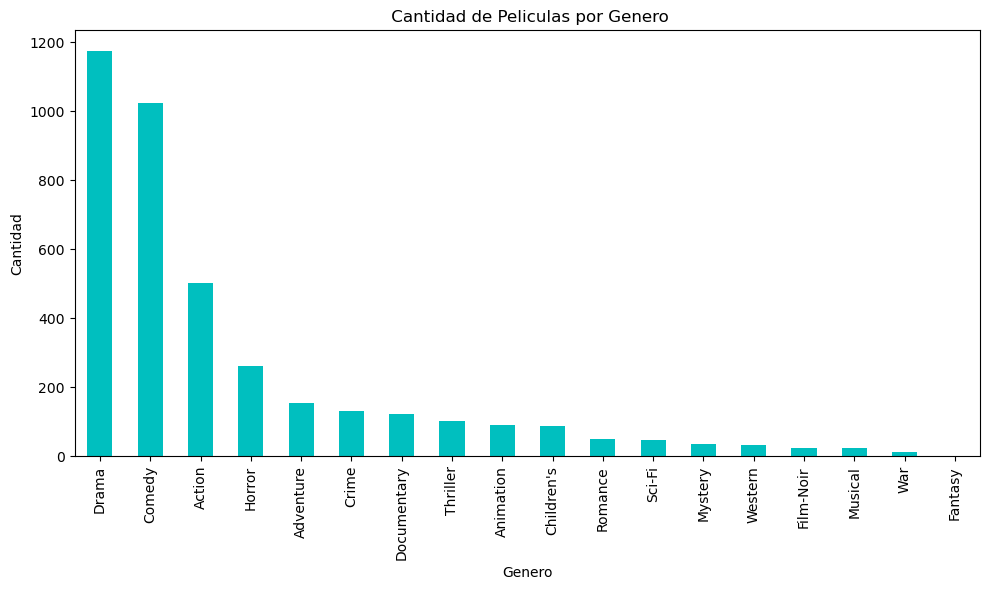

In [248]:
plt.figure(figsize=(10, 6))
Genero.plot(kind='bar', color='c')
plt.title(' Cantidad de Peliculas por Genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

### Con este grafico de barras podemos podemos identificar rapidamente la cantidad de peliculas por genero que contiene nuestro DataSet.

In [249]:
movies_20s = movies[(movies['Año'] >= 1920) & (movies['Año'] < 1930)]
count_movies_20s = movies_20s['Año'].count()

movies_30s = movies[(movies['Año'] >= 1930) & (movies['Año'] < 1940)]
count_movies_30s = movies_30s['Año'].count()

movies_40s = movies[(movies['Año'] >= 1940) & (movies['Año'] < 1950)]
count_movies_40s = movies_40s['Año'].count()

movies_50s = movies[(movies['Año'] >= 1950) & (movies['Año'] < 1960)]
count_movies_50s = movies_50s['Año'].count()

movies_60s = movies[(movies['Año'] >= 1960) & (movies['Año'] < 1970)]
count_movies_60s = movies_60s['Año'].count()

movies_70s = movies[(movies['Año'] >= 1970) & (movies['Año'] < 1980)]
count_movies_70s = movies_70s['Año'].count()

movies_80s = movies[(movies['Año'] >= 1980) & (movies['Año'] < 1990)]
count_movies_80s = movies_80s['Año'].count()

movies_90s = movies[(movies['Año'] >= 1990) & (movies['Año'] < 2000)]
count_movies_90s = movies_90s['Año'].count()

movies_2000s = movies[(movies['Año'] >= 2000) & (movies['Año'] <= 2001)]
count_movies_2000s = movies_2000s['Año'].count()

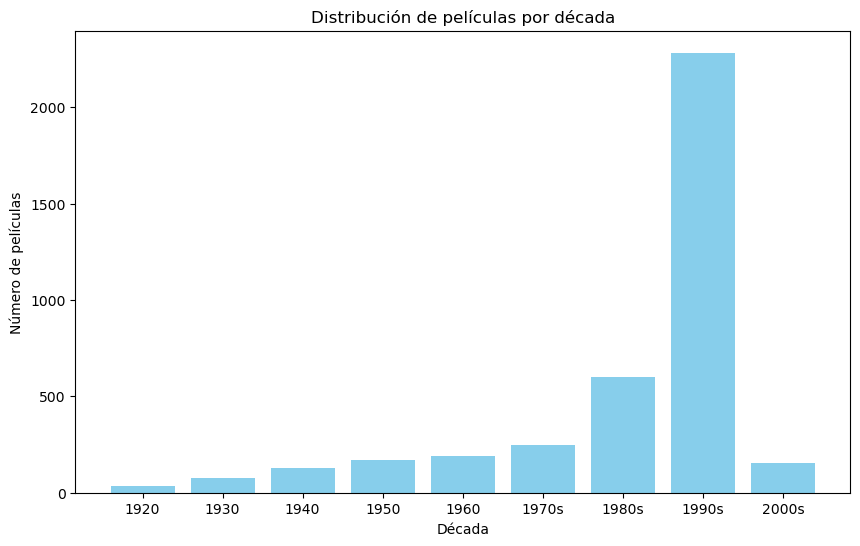

In [250]:
decadas = ['1920', '1930', '1940', '1950', '1960', '1970s', '1980s', '1990s', '2000s']
num_peliculas = [count_movies_20s, count_movies_30s, count_movies_40s, count_movies_50s, count_movies_60s, count_movies_70s, count_movies_80s, count_movies_90s, count_movies_2000s]

plt.figure(figsize=(10, 6))
plt.bar(decadas, num_peliculas, color='skyblue')
plt.xlabel('Década')
plt.ylabel('Número de películas')
plt.title('Distribución de películas por década')
plt.show()

### Por ultimo hemos graficado mediante la creacion de variables que realizan un conteo de las peliculas que se crearon por año, cuantas de ellas lo hicieron por decada. De esta manera podemos ver que en la decada de los 90s se filmaron mas de 2000 peliculas mientras que antes de los 80s no se superaban las 500.